In [ ]:
# For Python Environment without `ligavision`, eg. Google Colab
!pip install ligavision

In [1]:
from ligavision.dsl import conf
conf.image.notebook = "github"

In [2]:
from ligavision.spark import init_session
spark = init_session()

2023-02-21 17:39:41,149 INFO Rikai (__init__.py:127): setting spark.sql.extensions to net.xmacs.liga.spark.RikaiSparkSessionExtensions,org.apache.spark.sql.rikai.LigaImageExtensions
2023-02-21 17:39:41,149 INFO Rikai (__init__.py:127): setting spark.driver.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-21 17:39:41,150 INFO Rikai (__init__.py:127): setting spark.executor.extraJavaOptions to -Dio.netty.tryReflectionSetAccessible=true
2023-02-21 17:39:41,150 INFO Rikai (__init__.py:127): setting spark.jars to https://github.com/liga-ai/ligavision/releases/download/ligavision_0.2.0/liga-image-assembly_2.12-0.2.0.jar
23/02/21 17:39:42 WARN Utils: Your hostname, tubi resolves to a loopback address: 127.0.1.1; using 192.168.31.197 instead (on interface wlp0s20f3)
23/02/21 17:39:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To a

In [3]:
df = spark.sql("""
from (
select
  to_image('https://i.scdn.co/image/ab67616d0000b273466def3ce70d94dcacb13c8d') as jay,
  box2d(array(118, 18, 520, 136)) as box
)
select jay, box, crop(jay, array(box)) as cropped
""")

In [4]:
row = df.first()
df.printSchema()

root
 |-- jay: image (nullable = true)
 |-- box: box2d (nullable = true)
 |-- cropped: array (nullable = true)
 |    |-- element: image (containsNull = true)



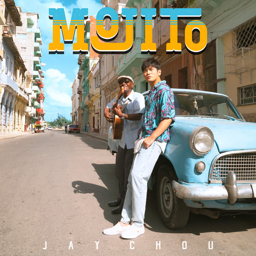

In [5]:
row.jay * 0.4

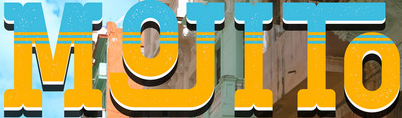

In [6]:
row.cropped[0]